In [1]:
import pandas as pd
import numpy as np 
import math
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score 
from sklearn.impute import KNNImputer
from plotnine import *
from matplotlib import pyplot as plt

# Modeling packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


#### Splitting the dataset into train and test set

In [2]:
music_dataframe = pd.read_csv("/workspaces/Music_Dataset/data/music_dataset_cleaned.csv")

- Changing the Class datatype to object 

In [3]:
music_dataframe.Class = music_dataframe.Class.astype(str)

In [4]:
music_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          17996 non-null  int64  
 1   Artist Name         17996 non-null  object 
 2   Track Name          17996 non-null  object 
 3   Popularity          17996 non-null  float64
 4   danceability        17996 non-null  float64
 5   energy              17996 non-null  float64
 6   key                 17996 non-null  float64
 7   loudness            17996 non-null  float64
 8   mode                17996 non-null  int64  
 9   speechiness         17996 non-null  float64
 10  acousticness        17996 non-null  float64
 11  instrumentalness    17996 non-null  float64
 12  liveness            17996 non-null  float64
 13  valence             17996 non-null  float64
 14  tempo               17996 non-null  float64
 15  duration_in min/ms  17996 non-null  float64
 16  time

In [5]:
class_col = music_dataframe.Class
train, test = train_test_split(music_dataframe, train_size=0.7, random_state=123, stratify=class_col)
train.shape

(12597, 18)

In [6]:
X_train = train.select_dtypes(exclude ='object')
#X_train = train.drop("Class", axis=1)
y_train = train[["Class"]]

In [7]:
X_test = test.select_dtypes(exclude ='object')
#X_test = test.drop("Class", axis=1)
y_test = test[["Class"]]

In [ ]:
stander = StandardScaler()
x_train = pd.DataFrame(stander.fit_transform(X_train), columns=col_list[0:16])
x_test = pd.DataFrame(stander.fit_transform(X_test), columns=col_list[0:16])


### Cross Validation 

- Cross Validation on Decision Tree model 

In [8]:
 
# create DT model object
dt_mod = DecisionTreeClassifier()
# define loss function
loss = 'neg_root_mean_squared_error'
# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
# fit model with 5-fold CV
results = cross_val_score(dt_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)
np.round(np.abs(results))

array([4., 4., 4., 4., 4.])

- Cross Validation on LogisticRegression model 

In [9]:
# create DT model object
lr_mod = LogisticRegression()
# define loss function
loss = 'neg_root_mean_squared_error'
# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
# fit model with 5-fold CV
results = cross_val_score(dt_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)
np.round(np.abs(results))

array([4., 4., 4., 4., 4.])

- Cross Validation on KNN model 

In [10]:

knn_mod = KNeighborsClassifier()
# define loss function
loss = 'neg_root_mean_squared_error'
# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
# fit model with 5-fold CV
results = cross_val_score(knn_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)
np.round(np.abs(results))

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors

array([4., 5., 5., 4., 4.])

- Cross Validation on Random Forest model 

In [11]:

rf_mod = RandomForestClassifier()
# define loss function
loss = 'neg_root_mean_squared_error'
# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
# fit model with 5-fold CV
results1 = cross_val_score(rf_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)
np.round(np.abs(results1))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.9/site-packages/sklearn/m

array([4., 4., 4., 3., 4.])

#### Features Importance 

- Features Importance plots 

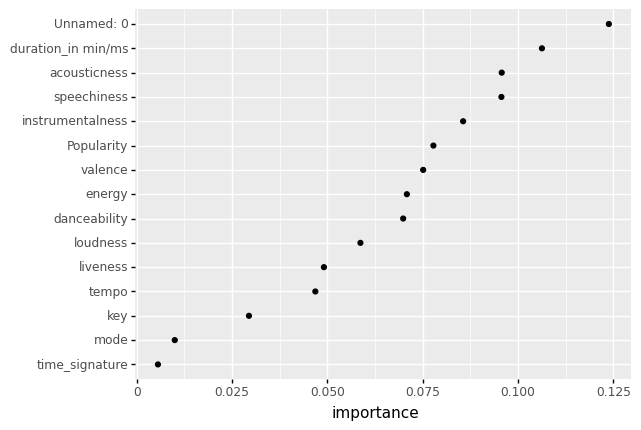

<ggplot: (8738927408077)>

In [12]:
final_model = DecisionTreeClassifier()
final_model_fit = final_model.fit(X_train, y_train)

# extract feature importances
vi = pd.DataFrame({'feature': X_train.columns,
                   'importance': final_model_fit.feature_importances_})

# get top 20 influential features
top_20_features = vi.nlargest(20, 'importance')

# plot feature importance
(ggplot(top_20_features, aes(x='importance', y='reorder(feature, importance)'))
 + geom_point()
 + labs(y=None))

/tmp/ipykernel_386/3527949188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


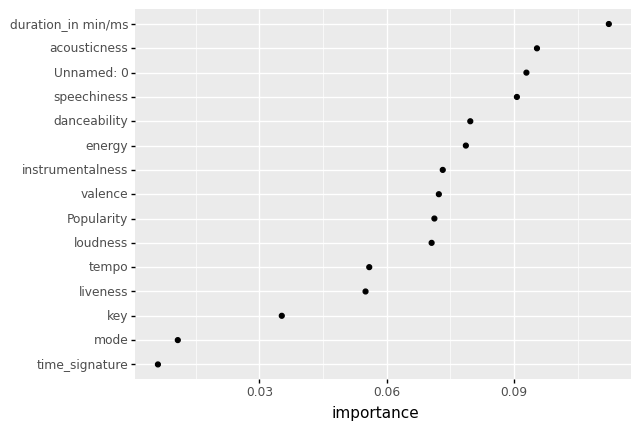

<ggplot: (8738976273080)>

In [13]:

final_model = RandomForestClassifier()
final_model_fit = final_model.fit(X_train, y_train)

# extract feature importances
vi = pd.DataFrame({'feature': X_train.columns,
                   'importance': final_model_fit.feature_importances_})

# get top 20 influential features
top_20_features = vi.nlargest(20, 'importance')

# plot feature importance
(ggplot(top_20_features, aes(x='importance', y='reorder(feature, importance)'))
 + geom_point()
 + labs(y=None))

### Features Selection 

- Decision Tree model using all numeric Features 

In [14]:
# all numric features 
dt_mod = DecisionTreeClassifier(max_depth=5)
dt_fit = dt_mod.fit(X_train, y_train)
y_pred = dt_fit.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45656603074643454


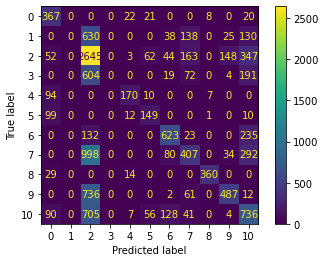

In [15]:
#import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#here clf1 is our trianed model
predictions = dt_mod.predict(X_train)
cm0 = confusion_matrix(y_train, predictions)
cm0
#this code will give you the confusion matrix result numerically

disp = ConfusionMatrixDisplay(
  confusion_matrix=cm0,
  )
  
disp.plot()

best node 

In [16]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2,80)), 'min_samples_split':[2,3,4,5]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(criterion='gini',random_state=123), params, verbose=1,cv=3)

grid_search_cv.fit(X_train,y_train)
#know check your best estimator
grid_search_cv.best_estimator_
#result [DecisionTreeClassifier(max_leaf_nodes=67, random_state=123)]

Fitting 3 folds for each of 312 candidates, totalling 936 fits


KeyboardInterrupt: 

best Depth 

In [ ]:
#know substitute max_leaf_nodes=67 into another cv and try to find the best value for max_depth
params = {'max_depth': list(range(1,50)), 'min_samples_split':[2,3,4, 5]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(criterion='gini',random_state=123, max_leaf_nodes =63), params, verbose=1,cv=3)

grid_search_cv.fit(X_train,y_train)

#know check your best estimator
grid_search_cv.best_estimator_
#result [DecisionTreeClassifier(max_depth=12, max_leaf_nodes=67, random_state=123)]

### Highest value I get for accuracy >> 48 %

In [ ]:
del musi['Track Name']

In [ ]:
#start encoding artist name
le = preprocessing.LabelEncoder()
le.fit(music_df['Artist Name'])


In [ ]:
music_df['Artist Name']=le.transform(music_df['Artist Name'])
music_df

Accuracy: 0.4800889053528431


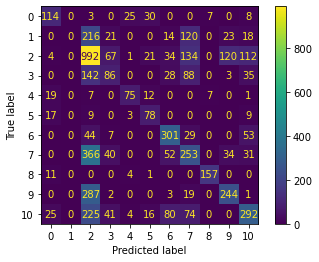

In [21]:
# all numric features 
dt_mod = DecisionTreeClassifier(criterion='gini',max_depth=12, max_leaf_nodes=63, random_state=123)
dt_fit = dt_mod.fit(X_train, y_train)
y_pred = dt_fit.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cm0 = confusion_matrix(y_test, y_pred)
cm0
#this code will give you the confusion matrix result numerically

disp = ConfusionMatrixDisplay(
  confusion_matrix=cm0,
  )
  
disp.plot()

- Trying with more features: energy , loudness and Popularity 

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

dt_mod = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Step 2: fit/train model
dt_fit = dt_mod.fit(X_train[["energy", "loudness", "duration_in min/ms", "speechiness", "valence"]], y_train)
y_pred = dt_fit.predict(X_test[["energy", "loudness", "duration_in min/ms", "speechiness", "valence"]])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

- Trying with more features: energy , loudness, Popularity and duration in min

In [ ]:
dt_mod = DecisionTreeClassifier(max_depth=5)

# Step 2: fit/train model
dt_fit = dt_mod.fit(X_train[["acousticness", ]], y_train)
y_pred = dt_fit.predict(X_test[["acousticness", ]])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))